In [1]:
# ---------------------------------导入模块------------------------------
import numpy as np
import pandas as pd
from pprint import pprint
#pip install gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import corpora, models, similarities

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

D:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
D:\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
D:\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, 

In [28]:
fig_path_lda = 'E:/泰迪杯/数据挖掘2021/论文图片/LDA/除不含名词的评论/'
fig_path_lda_best_topic = fig_path_lda + '酒店.html'
fig_path_lda_topics = fig_path_lda + '酒店.png'
text_path = 'E:/泰迪杯/数据挖掘2021/文本预处理结果/除不含名词的评论/酒店utf-8.csv'
result_path = 'E:/泰迪杯/数据挖掘2021/LDA结果/除不含名词的评论/酒店.csv'
result_path_gbk = 'E:/泰迪杯/数据挖掘2021/LDA结果/除不含名词的评论/酒店gbk.csv'

In [3]:
# ----------------------------------获取数据------------------------------------
path0 = 'E:/泰迪杯/数据挖掘2021/C/C题数据/清洗过的数据/酒店评论utf-8.csv'
reviews = pd.read_csv(path0, encoding='utf-8')['评论内容']
result = pd.read_csv(text_path, encoding='utf-8')

In [4]:
result

,index_content,word,nature,index_word
0,1,适合,v,0
1,1,家庭,n,1
2,1,出行,v,2
3,2,升级,vn,0
4,2,房间,n,1
...,...,...,...,...
229934,24778,极差,n,1
229935,24778,睡眠,v,2
229936,24778,崩溃,v,3
229937,24779,位置,v,0


In [5]:
result.shape

(229939, 4)

In [6]:
reviews.shape

(24780,)

# LDA主题分析

## 将分词的结果合并为嵌套列表，每一个小列表是同一评论的分词结果

In [7]:
# 传入分词后的数据框的每一行
def fenci(x, result_fenci):
    length = len(result_fenci)  # length对应index_content,值对应每条评论分词结果组成的列表
    if length < x[0]:
        for i in range(length + 1, x[0] + 1):
            length += 1
            result_fenci[length]=[]
    result_fenci[length].append(x[1])
    return result_fenci

In [8]:
# result_fenci第0个位置对应index_content=1
result_fenci = {}
result.apply(lambda x: fenci(x, result_fenci), axis=1)
result_fenci = list(result_fenci.values())

In [9]:
print('result_fenci length = ', len(result_fenci))
result_fenci

result_fenci length =  24779


[['适合', '家庭', '出行'],
 ['升级', '房间', '延迟', '退房', '赞'],
 ['几年', '广州', '每次', '住', '位置', '性价比', '不错', '免费', '升级', '房间'],
 [],
 ['超', '五星', '好评'],
 ['干净', '卫生', '服务'],
 ['位置', '传统', '标准', '五星', '唯一', '遗憾', '浴室', '浴缸', '淋浴间'],
 ['酒店设施', '稍微', '旧', '地理位置', '确实', '优越'],
 [],
 ['地理位置', '房间', '干净', '整洁'],
 ['地理位置', '地铁口', '米', '服务态度', '棒', '管理', '不断进步', '中', '下次', '入住', '点', '赞'],
 [],
 ['距离',
  '广州东站',
  '接送',
  '客人',
  '价格合理',
  '接受',
  '早餐',
  '不错',
  '吃',
  '好吃',
  '品种齐全',
  '适合',
  '老幼',
  '妇孺',
  '自行',
  '选择',
  '食用'],
 [],
 ['性价比', '高', '早餐', '品种', '面包', '种类', '地铁'],
 ['广州东站',
  '地铁站',
  '吃饭',
  '性价比',
  '不错',
  '推荐',
  '入住',
  '广州东站',
  '地铁站',
  '吃饭',
  '性价比',
  '不错',
  '推荐',
  '入住'],
 ['房间', '服务'],
 ['住', '性价比', '高'],
 ['广州东站', '旁边'],
 ['卫生'],
 ['地点', '佳', '服务'],
 ['不错', '服务'],
 ['早茶', '不错'],
 ['性价比', '高', '不错', '服务'],
 ['出差', '火车站', '对面', '服务'],
 ['服务', '挺不错', '环境'],
 [],
 ['朝食', '美味', '地下', '安心', '宿泊思', '広', '州', '張', '時', '宿', '頂'],
 ['交通', '位置', '便利', '购物', '吃'],
 ['不错', '住', '几天', '

## 创建字典和词袋

In [10]:
id2word = corpora.Dictionary(result_fenci)

# 将字典转换为词袋,为文档中的每一个单词创建唯一的ID
corpus = [id2word.doc2bow(sentence) for sentence in result_fenci]
print(corpus[:1])
# [[(1,3),(2,1)],[]] 返回的结果是列表套子列表，子列表中套元组，如（1,3）代表1在第一个文档中出现3次。

[[(0, 1), (1, 1), (2, 1)]]


In [11]:
# 可通过如下预期查询id对应的词
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('出行', 1), ('家庭', 1), ('适合', 1)]]


# 构建LDA主题模型

## 寻找LDA的最佳主题数

In [17]:
coherence_values = []
model_list = []
for num_topics in range(5,22,2):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                    id2word=id2word,
                    num_topics=num_topics,
                    # random_state=100,
                    # update_every=1,
                    # chunksize=100,
                    # passes=10,
                    # alpha='auto',
                    # per_word_topics=True
)
    model_list.append(lda_model)
    coherencemodel = CoherenceModel(model=lda_model, texts=result_fenci, dictionary=id2word, coherence='c_v')
    coherence_values.append(round(coherencemodel.get_coherence(),3))

## 最佳主题数可视化展示

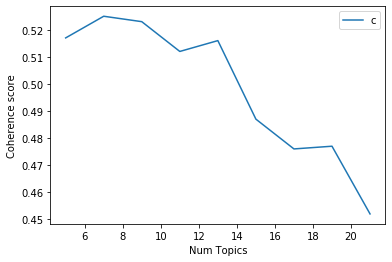

In [29]:
# 利用可视化的方式进行展示
x = range(5,22,2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig(fig_path_lda_topics)
plt.show()

## 展示不同主题数的一致性分数

In [19]:
# 展示不同的主题数对应的一致性分数
i = 0
best_model_pos = 0  # 最好的主题数在列表中的位置
best_num_topics = 5 # 最好的主题数量
best_cv = coherence_values[0]  # 最好的一致性分数
print(best_cv)
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    if cv > best_cv:
        best_model_pos = i
        best_num_topics = m
        best_cv = cv
    i = i + 1
print("Best Num Topics =", best_num_topics, " has Coherence Value of", round(best_cv, 4))

0.517
Num Topics = 5  has Coherence Value of 0.517
Num Topics = 7  has Coherence Value of 0.525
Num Topics = 9  has Coherence Value of 0.523
Num Topics = 11  has Coherence Value of 0.512
Num Topics = 13  has Coherence Value of 0.516
Num Topics = 15  has Coherence Value of 0.487
Num Topics = 17  has Coherence Value of 0.476
Num Topics = 19  has Coherence Value of 0.477
Num Topics = 21  has Coherence Value of 0.452
Best Num Topics = 7  has Coherence Value of 0.525


## LDA模型中的最佳主题

In [20]:
# 根据一致性得分，选择具有最高CV的模型，选择的主题数是
# 选择模型并打印主题
optimal_model = model_list[best_model_pos]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.038*"服务" + 0.026*"房间" + 0.021*"升级" + 0.020*"入住" + 0.020*"免费" + 0.016*"早餐" '
  '+ 0.015*"热情" + 0.014*"推荐" + 0.014*"满意" + 0.013*"不错"'),
 (1,
  '0.076*"服务" + 0.057*"干净" + 0.051*"卫生" + 0.032*"房间" + 0.020*"特别" + 0.016*"热情" '
  '+ 0.013*"温泉" + 0.012*"整洁" + 0.011*"喜欢" + 0.010*"入住"'),
 (2,
  '0.031*"房间" + 0.019*"位置" + 0.018*"旧" + 0.018*"地理位置" + 0.017*"住" + 0.015*"设施" '
  '+ 0.014*"机场" + 0.013*"早餐" + 0.011*"出行" + 0.011*"出差"'),
 (3,
  '0.030*"住" + 0.022*"舒服" + 0.020*"房间" + 0.017*"感觉" + 0.016*"入住" + 0.014*"性价比" '
  '+ 0.014*"下次" + 0.012*"太" + 0.010*"床" + 0.009*"高"'),
 (4,
  '0.014*"房" + 0.010*"旅游" + 0.009*"服務" + 0.008*"时" + 0.007*"房间" + 0.007*"好评" + '
  '0.007*"游玩" + 0.007*"套房" + 0.007*"选择" + 0.007*"订"'),
 (5,
  '0.124*"不错" + 0.066*"环境" + 0.060*"服务" + 0.054*"早餐" + 0.035*"位置" + 0.032*"交通" '
  '+ 0.028*"设施" + 0.027*"房间" + 0.022*"性价比" + 0.018*"高"'),
 (6,
  '0.024*"房间" + 0.020*"差" + 0.017*"服务态度" + 0.017*"入住" + 0.015*"疫情" + '
  '0.013*"空调" + 0.012*"太" + 0.011*"期间" + 0.010*"点" + 0.009*"体验"')]

In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis1 = pyLDAvis.gensim_models.prepare(optimal_model, corpus, id2word)
vis1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.029190 -0.155854       1        1  18.774135
2     -0.074621  0.078069       2        1  17.515222
0     -0.041667 -0.126151       3        1  16.509781
5     -0.226198  0.025271       4        1  15.084586
6      0.107554  0.156792       5        1  12.458099
3      0.046474  0.116186       6        1  11.572645
4      0.217648 -0.094313       7        1   8.085533, topic_info=   Term         Freq        Total Category  logprob  loglift
8    不错  5432.000000  5432.000000  Default  30.0000  30.0000
77   环境  2807.000000  2807.000000  Default  29.0000  29.0000
21   服务  7429.000000  7429.000000  Default  28.0000  28.0000
20   干净  2798.000000  2798.000000  Default  27.0000  27.0000
19   卫生  2401.000000  2401.000000  Default  26.0000  26.0000
..  ...          ...          ...      ...      ...      ...
5    房间   138.728146  5950.564239   Topic7  -4.8980  -1.2436
10    住   110.812660  2204.428612   Topic7  -5.1226  -0.4753
39   入住   112.826217  2516.368234   Topic7  -5.1046  -0.5896
21   服务    85.424856  7429.827848   Topic7  -5.3828  -1.9505
3    升级    73.881251   976.879560   Topic7  -5.5280  -0.0668

[525 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1837      1  0.974747   一份
1837      5  0.024369   一份
1201      3  0.981515   一会
657       1  0.975878   一条
152       1  0.108505   一流
...     ...       ...  ...
348       3  0.048459   齐全
348       4  0.753312   齐全
348       5  0.024229   齐全
348       6  0.024229   齐全
348       7  0.002203   齐全

[1277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 6, 7, 4, 5])

In [30]:
# 将结果保存为该html文件
pyLDAvis.save_html(vis1, fig_path_lda_best_topic)

## 寻找具体的最佳话题

In [23]:
# ----------------------------------------在每个句子中找到主要话题--------------------------------------------
# 每个文档都包含多个主题。但是，通常只有一个主题是主导的。下面的代码为每个句子提取该主要主题，并在格式正确的输出中显示该主题和关键字的权重。
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0: # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),                 round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [24]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=result_fenci)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.7856,"房间, 位置, 旧, 地理位置, 住, 设施, 机场, 早餐, 出行, 出差","[适合, 家庭, 出行]"
1,1,0.0,0.8565,"服务, 房间, 升级, 入住, 免费, 早餐, 热情, 推荐, 满意, 不错","[升级, 房间, 延迟, 退房, 赞]"
2,2,2.0,0.5995,"房间, 位置, 旧, 地理位置, 住, 设施, 机场, 早餐, 出行, 出差","[几年, 广州, 每次, 住, 位置, 性价比, 不错, 免费, 升级, 房间]"
3,3,0.0,0.1429,"服务, 房间, 升级, 入住, 免费, 早餐, 热情, 推荐, 满意, 不错",[]
4,4,4.0,0.5070,"房, 旅游, 服務, 时, 房间, 好评, 游玩, 套房, 选择, 订","[超, 五星, 好评]"
5,5,1.0,0.7856,"服务, 干净, 卫生, 房间, 特别, 热情, 温泉, 整洁, 喜欢, 入住","[干净, 卫生, 服务]"
6,6,2.0,0.9142,"房间, 位置, 旧, 地理位置, 住, 设施, 机场, 早餐, 出行, 出差","[位置, 传统, 标准, 五星, 唯一, 遗憾, 浴室, 浴缸, 淋浴间]"
7,7,2.0,0.8774,"房间, 位置, 旧, 地理位置, 住, 设施, 机场, 早餐, 出行, 出差","[酒店设施, 稍微, 旧, 地理位置, 确实, 优越]"
8,8,0.0,0.1429,"服务, 房间, 升级, 入住, 免费, 早餐, 热情, 推荐, 满意, 不错",[]
9,9,1.0,0.6126,"服务, 干净, 卫生, 房间, 特别, 热情, 温泉, 整洁, 喜欢, 入住","[地理位置, 房间, 干净, 整洁]"


In [31]:
df_dominant_topic.to_csv(result_path, encoding='utf-8', index=False)
df_dominant_topic.to_csv(result_path_gbk, encoding='gbk', index=False)